In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

def generate_default_plot_env():
    sns.set(font_scale=1.4, style="whitegrid")
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    matplotlib.rc('font', family='sans-serif') 
    matplotlib.rc('font', serif='Helvetica Neue') 
    matplotlib.rc('text', usetex='false') 
    matplotlib.rcParams.update({'font.size': 22})
    
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    plt.rc('font', family='sans-serif') 
    plt.rc('font', serif='Helvetica Neue') 
    plt.rc('text', usetex='false') 
    plt.rcParams.update({'font.size': 22})

# pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)

global_min_steps = 500
global_max_steps = 50000
global_min_points = 10

import statsmodels.formula.api as sm

In [2]:
generate_default_plot_env()

In [3]:
sim_df = pd.read_csv("../data/new_simulation_results.csv", header=[0, 1])
sim_df.columns = ["target_ws"] + list(sim_df.columns[1:])

In [4]:
def plot_quantity(df, colname, ylabel, xlabel, color='#590059', ax=None):
    ax.fill_between(x=df['target_ws'], 
                    y1=df[colname, 'percentile_2.5'],
                    y2=df[colname, 'percentile_97.5'],
                    zorder=2,
                    color="#DACDDC");
    ax.plot(df['target_ws'], df[colname, 'mean'], color=color, zorder=3);

    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);

    # for label in ax.xaxis.get_ticklabels()[1::2]:
    #     label.set_visible(False)
    plt.grid(False)
    
    plt.xlim(0, 100);
    plt.tight_layout()
    
    return ax

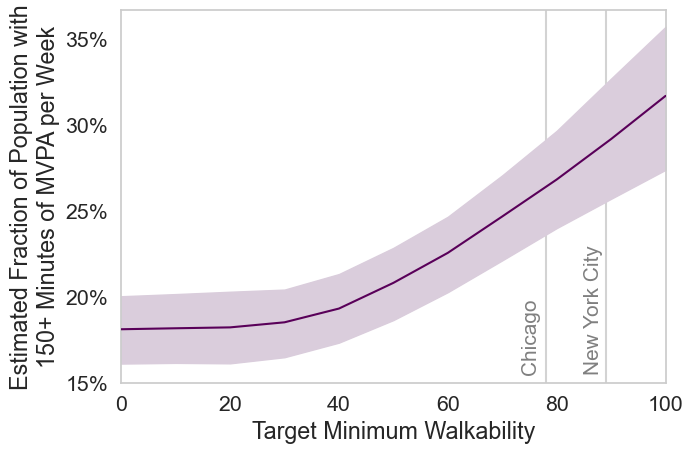

In [5]:
fig, ax = plt.subplots(figsize=(7.5, 5))

ax.axvline(x=78, color="lightgray", ls="-", zorder=1);
ax.annotate("Chicago",
                    xy=(77, 0.155), xycoords='data',
                    xytext=(0, 0), textcoords='offset pixels',
                    size=15, color='gray', rotation=90, ha="right", va="bottom");

ax.axvline(x=89, color="lightgray", ls="-", zorder=1);
ax.annotate("New York City",
                    xy=(88.5, 0.155), xycoords='data',
                    xytext=(0, 0), textcoords='offset pixels',
                    size=15, color='gray', rotation=90, ha="right", va="bottom");

ax = plot_quantity(sim_df, 'avg_post_move_frac_pop_MVPAs', 
              'Estimated Fraction of Population with\n150+ Minutes of MVPA per Week', 
              'Target Minimum Walkability', ax=ax);
plt.yticks(np.arange(0.15, 0.36, 0.05))
vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in vals]);

plt.savefig('../output/fig5a_new.pdf', dpi=300)

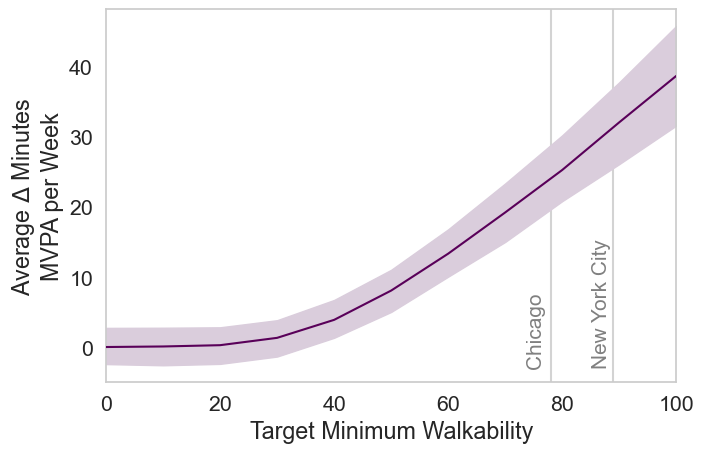

In [6]:
fig, ax = plt.subplots(figsize=(7.5, 5))

ax.axvline(x=78, color="lightgray", ls="-", zorder=1);
ax.annotate("Chicago",
                    xy=(77, -3), xycoords='data',
                    xytext=(0, 0), textcoords='offset pixels',
                    size=15, color='gray', rotation=90, ha="right", va="bottom");

ax.axvline(x=89, color="lightgray", ls="-", zorder=1);
ax.annotate("New York City",
                    xy=(88.5, -3), xycoords='data',
                    xytext=(0, 0), textcoords='offset pixels',
                    size=15, color='gray', rotation=90, ha="right", va="bottom");

plot_quantity(sim_df, 'avg_delta_minutes_MVPAs', 
              'Average $\Delta$ Minutes\nMVPA per Week', 
              'Target Minimum Walkability', ax=ax);

plt.savefig('../output/fig5b_new.pdf', dpi=300)

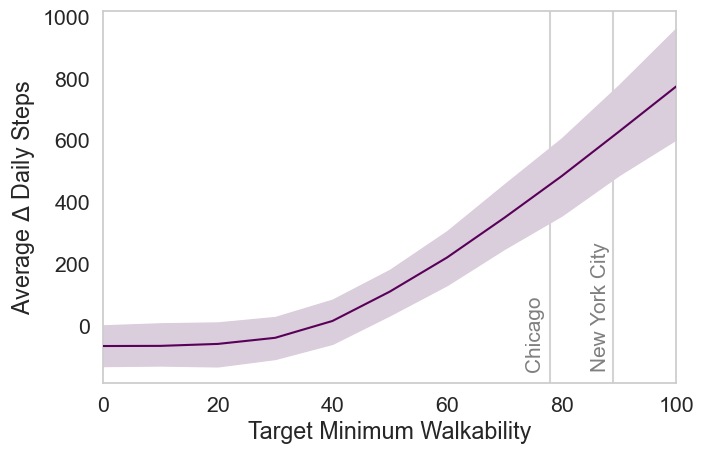

In [7]:
fig, ax = plt.subplots(figsize=(7.5, 5))

ax.axvline(x=78, color="lightgray", ls="-", zorder=1);
ax.annotate("Chicago",
                    xy=(77, -150), xycoords='data',
                    xytext=(0, 0), textcoords='offset pixels',
                    size=15, color='gray', rotation=90, ha="right", va="bottom");

ax.axvline(x=89, color="lightgray", ls="-", zorder=1);
ax.annotate("New York City",
                    xy=(88.5, -150), xycoords='data',
                    xytext=(0, 0), textcoords='offset pixels',
                    size=15, color='gray', rotation=90, ha="right", va="bottom");

plot_quantity(sim_df, 'avg_delta_daily_steps', 
              'Average $\Delta$ Daily Steps', 
              'Target Minimum Walkability', ax=ax);

plt.savefig('../output/fig5c_new.pdf', dpi=300)